<a href="https://colab.research.google.com/github/ark610475/DM2024-Lab1-Master/blob/main/Lab1p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Information**

**Name:** 張仲濡

**Student ID:**  113062572

**GitHub ID:**

In [1]:
!pip3 install pami
!pip3 install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 6.7 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3311 sha256=b9b1dd9b73241de4c633455e2a3d928d9d92625a1f70d08e2551ad263d3624cb
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: fi

In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
%matplotlib inline

In [3]:
!git clone https://github.com/ark610475/DM2024-Lab1-Master.git

Cloning into 'DM2024-Lab1-Master'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 134 (delta 39), reused 18 (delta 18), pack-reused 77 (from 1)
Receiving objects: 100% (134/134), 19.22 MiB | 24.98 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [68]:
ytc = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [69]:
len(ytc)

1500

In [71]:
ytc.head()

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [72]:
for i in range(len(ytc)) :
  if ytc.loc[i,"sentiment"] == "not nostalgia" :
    ytc.loc[i,"sentiment_num"] = 0
  else :
    ytc.loc[i,"sentiment_num"] = 1

ytc['sentiment_num'] = ytc['sentiment_num'].astype(int)

In [73]:
ytc.head()

,sentiment,comment,sentiment_num
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1


In [7]:
import sys
sys.path.append('/content/DM2024-Lab1-Master')

import helpers.data_mining_helpers as dmh

In [74]:
ytc.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_num
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [75]:
sum(ytc.duplicated())

1

In [76]:
duplicate_rows = ytc[ytc.duplicated(keep=False)]
print(duplicate_rows)

        sentiment                                            comment  \
62  not nostalgia  never heard this song before... WOW What an am...   
78  not nostalgia  never heard this song before... WOW What an am...   

    sentiment_num  
62              0  
78              0  


In [77]:
ytc.drop_duplicates(keep=False, inplace=True)

In [78]:
len(ytc)

1498

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

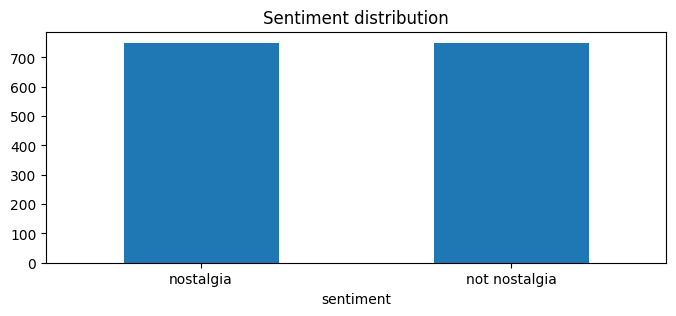

In [79]:
print(ytc.sentiment.value_counts())

ytc.sentiment.value_counts().plot(kind = "bar", title = "Sentiment distribution", rot = 0, figsize = (8,3))

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
ytc_tfidf = vectorizer.fit_transform(ytc.comment)
vectorizer.get_feature_names_out()

array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

In [104]:
print(ytc_tfidf.shape)

(1498, 3730)


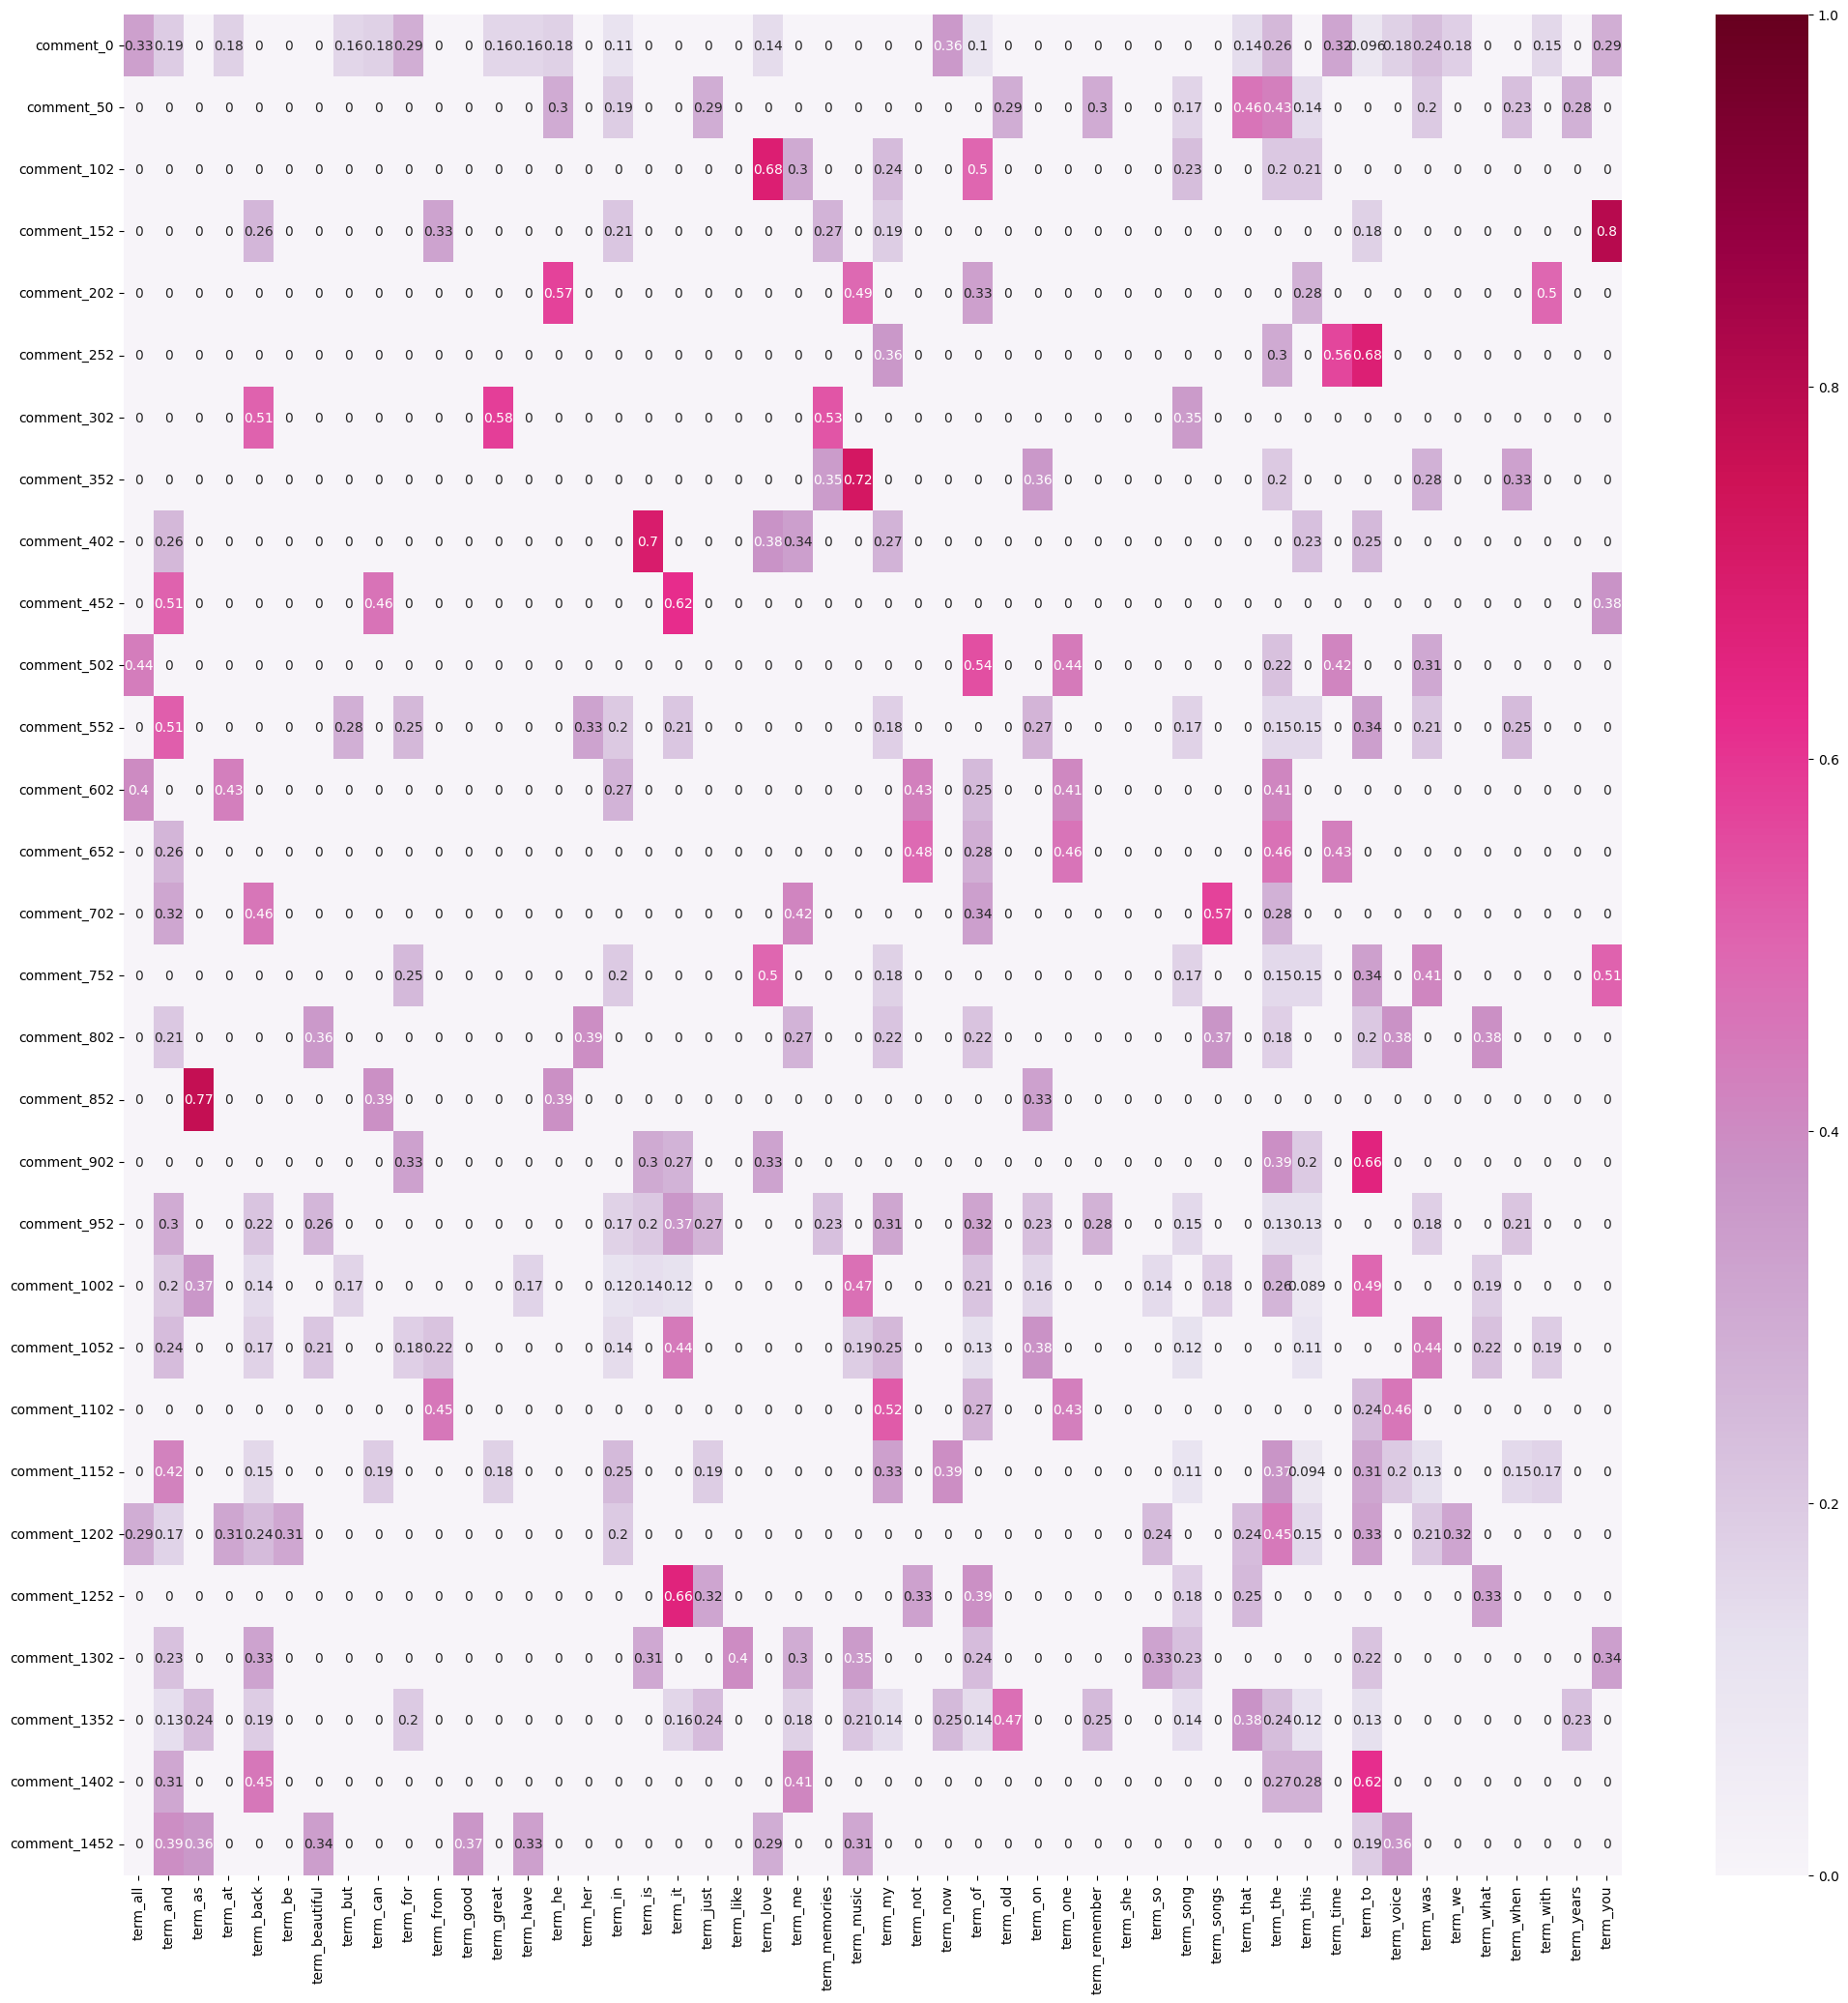

In [107]:
import seaborn as sns

vectorizer = TfidfVectorizer(max_features=50)
ytc_tfidf = vectorizer.fit_transform(ytc.comment)
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[:50]]
plot_y = ["comment_"+ str(i) for i in list(ytc.index)[:1498:50]]
plot_z = ytc_tfidf[:1498:50,:50].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25,25))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)